**Universidad de Buenos Aires**
 \
**Laboratorio de Sistemas Embebidos**
 \
**Especialización en Inteligencia Artificial**
 \
**Aprendizaje Automático**
\
\
Integrantes:
 \
<b>Martín, Matías</b>
 \
<b>Rodríguez, Joaquín</b>
 \
<b>Querales, Gabriel</b>
\
\
Dataset:
<b>Ventas de videojuegos en Steam</b>

## Imports

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
#from sqlalchemy import create_engine, MetaData, text
import json
from io import StringIO

---

## Carga de los dataset

Carga del dataset desde un archivo .csv que obtuvimos del sitio de Kaggle

In [274]:
df = pd.read_csv("ventas_juegos_steam.csv", header=0, index_col=0)
# Exploramos las primeras filas del dataframe para entender su estructura
df.head(12)

,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads
game_name,,,,,,,,,,,,,,
Counter-Strike 2,86,8803754,"21 Aug, 2012",Valve,"FPS, Action, Tactical","win, linux","English, Czech, Danish, Dutch, Finnish, French...",0.00,"Cross-Platform Multiplayer, Steam Trading Card...",17,3.20,4,80,306170000
PUBG: BATTLEGROUNDS,59,2554482,"21 Dec, 2017",PUBG Corporation,"Survival, Shooter, Action, Tactical",win,"English, Korean, Simplified Chinese, French, G...",0.00,"Online PvP, Stats, Remote Play on Phone, Remot...",13,3.10,4,73,162350000
ELDEN RING NIGHTREIGN,77,53426,"30 May, 2025","FromSoftware, Inc.","Souls-like, Open World, Fantasy, RPG",win,"English, Japanese, French, Italian, German, Sp...",25.99,"Single-player, Online Co-op, Steam Achievement...",17,3.96,4,50,840000
The Last of Us™ Part I,79,45424,"28 Mar, 2023",Naughty Dog LLC,"Story Rich, Shooter, Survival, Horror",win,"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"Single-player, Steam Achievements, Steam Tradi...",17,4.10,3,24,2000000
Red Dead Redemption 2,92,672140,"5 Dec, 2019",Rockstar Games,"Open World, Story Rich, Adventure, Realistic, ...",win,"English, French, Italian, German, Spanish - Sp...",59.99,"Single-player, Online PvP, Online Co-op, Steam...",17,4.32,3,80,21610000
Dota 2,81,2497040,"9 Jul, 2013",Valve,"Strategy, Action, Combat","win, mac, linux","English, Bulgarian, Czech, Danish, Dutch, Finn...",0.00,"Steam Trading Cards, Steam Workshop, SteamVR C...",13,3.71,4,80,234950000
EA SPORTS FC™ 25,49,67600,"27 Sep, 2024",EA Canada,"Sports, Simulation, Realistic",win,"English, French, Italian, German, Spanish - Sp...",69.99,"Single-player, Online PvP, Shared/Split Screen...",0,3.20,3,48,2320000
Project Zomboid,94,284985,"8 Nov, 2013",The Indie Stone,"Early Access, RPG, Simulation, Survival, Open ...","win, mac, linux","English, French, Italian, German, Spanish - Sp...",10.49,"Single-player, Online PvP, Online Co-op, Share...",17,3.66,4,59,21370000
Game of Thrones: Kingsroad,61,2667,"22 May, 2025",Netmarble Neo,"Action, Adventure, RPG, Open World, Fantasy",win,"English, French, Italian, German, Spanish - Sp...",0.00,"Single-player, Online Co-op, In-App Purchases",17,3.40,3,42,361500


In [275]:
# Exploramos las ultimas filas del dataframe para ver si hay datos faltantes o inconsistencias
df.tail()

,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads
game_name,,,,,,,,,,,,,,
Wooden House,38,147,"5 Sep, 2016",GDNomaD,Simulation,win,English,0.89,"Single-player, Steam Trading Cards, Family Sha...",17,1.24,3,1,221000
Shoot. Push. Repeat.,84,65,"8 Jun, 2020",CrewLab,"Puzzle, 2D",win,"English, French, Italian, German, Spanish - Sp...",0.89,"Single-player, Steam Achievements, Steam Cloud...",0,3.64,1,3,2700
X2: The Threat,83,416,"3 Dec, 2003",Egosoft,"Strategy, Simulation",win,"English, French, German, Italian, Spanish - Sp...",2.99,"Single-player, Captions available, Steam Cloud...",13,3.61,4,60,47500
!AnyWay!,71,498,"6 Jun, 2018",EYEFRONT,"Platformer, 2D",win,"English, Russian, French, Italian, German, Pol...",1.35,"Single-player, Steam Achievements, Steam Tradi...",0,3.00,3,2,79000
UBERMOSH:OMEGA,93,314,"8 Nov, 2019",Walter Machado,"Action, Pixel Graphics",win,"English, French, Italian, German, Spanish - Sp...",0.89,"Single-player, Steam Achievements, Family Sharing",13,4.17,5,12,14000


### Verificación de nulos

In [276]:
# Ver si hay algún valor faltante en general
hay_nan = df.isnull().values.any()
print("¿Hay datos faltantes en el DataFrame?", hay_nan)

# Ver la cantidad de valores faltantes por columna
faltantes_por_columna = df.isnull().sum()
print("\nDatos faltantes por columna:")
print(faltantes_por_columna)

# También podés ver un resumen más visual
print("\nPorcentaje de datos faltantes por columna:")
print((df.isnull().mean() * 100).round(2))


¿Hay datos faltantes en el DataFrame? False

Datos faltantes por columna:
reviews_like_rate      0
all_reviews_number     0
release_date           0
developer              0
user_defined_tags      0
supported_os           0
supported_languages    0
price                  0
other_features         0
age_restriction        0
rating                 0
difficulty             0
length                 0
estimated_downloads    0
dtype: int64

Porcentaje de datos faltantes por columna:
reviews_like_rate      0.0
all_reviews_number     0.0
release_date           0.0
developer              0.0
user_defined_tags      0.0
supported_os           0.0
supported_languages    0.0
price                  0.0
other_features         0.0
age_restriction        0.0
rating                 0.0
difficulty             0.0
length                 0.0
estimated_downloads    0.0
dtype: float64


---

## Limpieza de datos mal formados

Como ya mencionamos detectamos un pequeño error en dos entradas del dataset en las que una entrada separada por comas estuvo mal cargada habiendo una coma de más que causa la carga de un valor vacío. 

Estos son el juego Age of Wonders 4 en la columna de user_defined_tags y el juego Heaven Forest Nights en supported_os. 

Procedemos a corregirlo: 


In [277]:
print(df.columns)


Index(['reviews_like_rate', 'all_reviews_number', 'release_date', 'developer',
       'user_defined_tags', 'supported_os', 'supported_languages', 'price',
       'other_features', 'age_restriction', 'rating', 'difficulty', 'length',
       'estimated_downloads'],
      dtype='object')


In [278]:
# Limpiamos
for col in ['user_defined_tags', 'supported_os']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.rstrip(', ')


In [279]:
df.head()

,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads
game_name,,,,,,,,,,,,,,
Counter-Strike 2,86,8803754,"21 Aug, 2012",Valve,"FPS, Action, Tactical","win, linux","English, Czech, Danish, Dutch, Finnish, French...",0.00,"Cross-Platform Multiplayer, Steam Trading Card...",17,3.20,4,80,306170000
PUBG: BATTLEGROUNDS,59,2554482,"21 Dec, 2017",PUBG Corporation,"Survival, Shooter, Action, Tactical",win,"English, Korean, Simplified Chinese, French, G...",0.00,"Online PvP, Stats, Remote Play on Phone, Remot...",13,3.10,4,73,162350000
ELDEN RING NIGHTREIGN,77,53426,"30 May, 2025","FromSoftware, Inc.","Souls-like, Open World, Fantasy, RPG",win,"English, Japanese, French, Italian, German, Sp...",25.99,"Single-player, Online Co-op, Steam Achievement...",17,3.96,4,50,840000
The Last of Us™ Part I,79,45424,"28 Mar, 2023",Naughty Dog LLC,"Story Rich, Shooter, Survival, Horror",win,"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"Single-player, Steam Achievements, Steam Tradi...",17,4.10,3,24,2000000
Red Dead Redemption 2,92,672140,"5 Dec, 2019",Rockstar Games,"Open World, Story Rich, Adventure, Realistic, ...",win,"English, French, Italian, German, Spanish - Sp...",59.99,"Single-player, Online PvP, Online Co-op, Steam...",17,4.32,3,80,21610000


### Dataset

In [280]:
df_features = pd.read_csv("ventas_juegos_steam_clean.csv", header=0, index_col=0)

In [281]:
#df_features =df.copy()

---

## Selección de features

---

### Variables numéricas

Nuestro objetivo es identificar qué variables son relevantes para predecir la variable objetivo review_like_rate, optimizando la calidad del modelo.

In [282]:
#df_features = df # Copiamos el dataset para trabajar en la selección de características

In [283]:
df_features.head()

,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads,release_year
game_name,,,,,,,,,,,,,,,
ELDEN RING NIGHTREIGN,77,53426,2025-05-30,"FromSoftware, Inc.","Souls-like, Open World, Fantasy, RPG",win,"English, Japanese, French, Italian, German, Sp...",25.99,"Single-player, Online Co-op, Steam Achievement...",17,3.96,4,50,840000,2025
The Last of Us™ Part I,79,45424,2023-03-28,Naughty Dog LLC,"Story Rich, Shooter, Survival, Horror",win,"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"Single-player, Steam Achievements, Steam Tradi...",17,4.10,3,24,2000000,2023
Game of Thrones: Kingsroad,61,2667,2025-05-22,Netmarble Neo,"Action, Adventure, RPG, Open World, Fantasy",win,"English, French, Italian, German, Spanish - Sp...",0.00,"Single-player, Online Co-op, In-App Purchases",17,3.40,3,42,361500,2025
RoadCraft,72,5134,2025-05-20,Saber Interactive,"Simulation, Building, Driving",win,"English, French, Italian, German, Spanish - Sp...",27.99,"Single-player, Online Co-op, Cross-Platform Mu...",0,3.20,3,26,325900,2025
R.E.P.O.,96,147407,2025-02-26,semiwork,"Early Access, Horror",win,English,5.79,"Single-player, Online Co-op, Steam Cloud, Fami...",10,3.58,4,54,12950000,2025


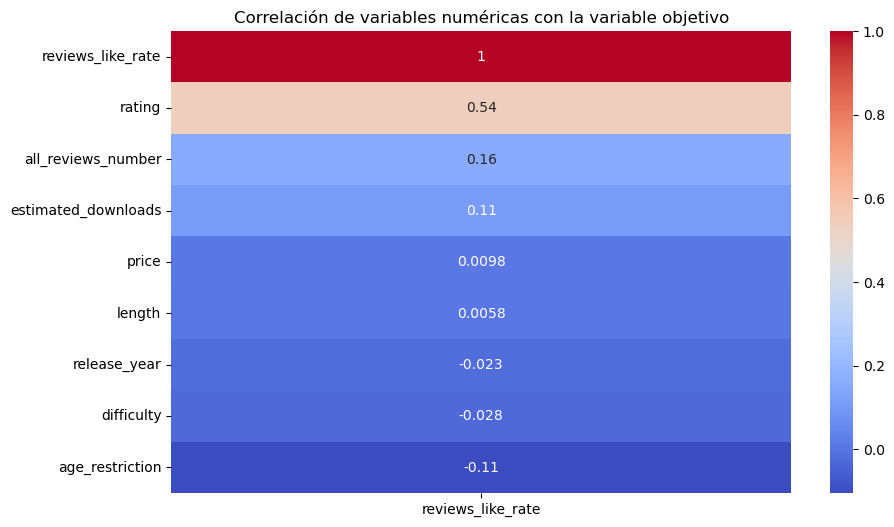

In [284]:
# Seleccionamos las variables numéricas
numerical_features = df_features.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr()

# Ordenamos por la VO
correlation_with_target = correlation_matrix["reviews_like_rate"].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap="coolwarm")
plt.title("Correlación de variables numéricas con la variable objetivo")
plt.show()


### Rating

Como puede verse, entre las variables numéricas, solamente la variable "rating" es la que tiene una correlación significativa con la variable objetivo. Dada la naturaleza de ambas variables sería esperable que así fuera ya que ambas son diferentes maneras de calificar los juegos por parte de los usuarios, sin embargo nos resulta interesante ver que la correlación no es tan alta como sería esperable.

Esto sugiere que, si bien rating y reviews_like_rate están relacionadas, no son equivalentes. Esto puede deberse a que cada una captura aspectos distintos de la percepción de los usuarios: mientras que review_like_rate se basa en un esquema binario de likes/dislikes, rating refleja una calificación entre 1 y 5 estrellas.

Decidimos entonces **mantener la variable rating** como feature, ya que aporta información relevante pero no completamente redundante con la variable objetivo. Además, al no ser una variable derivada directa de review_like_rate, su inclusión puede mejorar la capacidad predictiva del modelo sin generar data leakage.

---


In [285]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Dataset solo con rating como feature
X_rating = df_features[["rating"]]
y = df_features["reviews_like_rate"]

# Regresión lineal simple
model_rating_only = LinearRegression()
scores_rating = cross_val_score(model_rating_only, X_rating, y, cv=5, scoring='r2')
print(f"Modelo con solo rating - R² promedio: {scores_rating.mean():.4f}")


Modelo con solo rating - R² promedio: 0.2636


Realizamos esta prueba para corroborar el valor de R² solamente con la variable ratings y obtuvimos un promedio de 0.26, lo que significa que esta variable es capaz de explicar cerca del 26% de la variablidad de la VO.

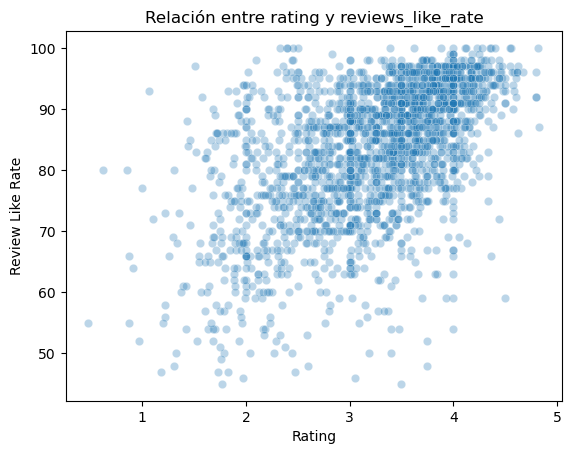

In [286]:
# %%
sns.scatterplot(data=df_features, x='rating', y='reviews_like_rate', alpha=0.3)
plt.title("Relación entre rating y reviews_like_rate")
plt.xlabel("Rating")
plt.ylabel("Review Like Rate")
plt.show()


El gráfico de dispersión entre las variables muestra una tendencia lineal entre ambas variables, lo cual confirma que a mayor calificación promedio, tiende a haber una mayor proporción de reseñas positivas. Sin embargo, también se observa bastante dispersión vertical para un mismo valor de rating, especialmente entre 3 y 4 estrellas. Esto refuerza lo encontrado en el análisis de R²: si bien rating tiene poder explicativo, no es suficiente por sí sola para capturar completamente el comportamiento de la variable objetivo. La presencia de muchos puntos con rating similar pero review_like_rate muy diferente sugiere que hay otros factores relevantes en juego, que seguiremos viendo a continuación.

### Demás variables numéricas

Si bien algunas variables numéricas muestran una correlación baja con la variable objetivo, decidimos no descartarlas en esta etapa. La correlación no mide el aporte de una variable al modelo en combinación con otras, ni captura relaciones no lineales. Por eso, como se trabajó en clase, vamos a tratar de evaluar el valor predictivo de estas utilizando Lasso.

In [287]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Variables numéricas con baja correlación
numerical_vars = ['all_reviews_number', 'estimated_downloads', 'length', 'difficulty', 'price', 'age_restriction']
X = df_features[numerical_vars]
y = df_features["reviews_like_rate"]

# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicamos Lasso con validación cruzada (cv=5)
lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_scaled, y)

# Asociamos los coeficientes aprendidos a las variables
coef = pd.Series(lasso.coef_, index=numerical_vars)

# Mostramos los resultados
print("Coeficientes obtenidos con Lasso:")
print(coef)


Coeficientes obtenidos con Lasso:
all_reviews_number     1.150561
estimated_downloads    0.000000
length                -0.000000
difficulty            -0.000000
price                 -0.000000
age_restriction       -0.634786
dtype: float64


Habiendo aplicado Lasso podemos ver claramente que tampoco desde el punto de vista multivariable se nota una relación lineal entre estas variables y la VO. Esto nos resulta un poco inesperado ya que creíamos que sería un factor a tener en cuenta el precio (variable price) que alguien paga por un juego y las chances de que quede conforme con él, o la popularidad del mismo (variable estimated_downloads) y qué tan bueno se percibe que es, por poner ejemplos.  


Por esta razón decidimos realizar un último análisis de tipo no lineal con un RandomForestRegresor, esto nos va a ayudar a ver si hay relaciones subyacentes de tipo no lineal operando y si esto confirma o no nuestras sospechas.

In [288]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

X = df_features[['all_reviews_number', 'estimated_downloads', 'length', 'difficulty', 'price', 'age_restriction']]
y = df_features['reviews_like_rate']
rf_model = RandomForestRegressor(random_state=0)
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"Random Forest - R² promedio: {rf_scores.mean():.4f}")

Random Forest - R² promedio: 0.1113


El resultado (R² = 0.094) indica que incluso con un modelo capaz de capturar relaciones complejas, estas variables tienen un poder predictivo muy limitado respecto a reviews_like_rate. Nuestras sospechas no se corroboran. Procedemos a eliminar estas variables de las features. 

In [289]:
variables_a_eliminar = ['all_reviews_number', 'estimated_downloads', 'length', 'difficulty', 'price', 'age_restriction']
df_features = df_features.drop(columns=variables_a_eliminar)

df_features.head()


,reviews_like_rate,release_date,developer,user_defined_tags,supported_os,supported_languages,other_features,rating,release_year
game_name,,,,,,,,,
ELDEN RING NIGHTREIGN,77,2025-05-30,"FromSoftware, Inc.","Souls-like, Open World, Fantasy, RPG",win,"English, Japanese, French, Italian, German, Sp...","Single-player, Online Co-op, Steam Achievement...",3.96,2025
The Last of Us™ Part I,79,2023-03-28,Naughty Dog LLC,"Story Rich, Shooter, Survival, Horror",win,"English, Italian, Spanish - Spain, Czech, Dutc...","Single-player, Steam Achievements, Steam Tradi...",4.10,2023
Game of Thrones: Kingsroad,61,2025-05-22,Netmarble Neo,"Action, Adventure, RPG, Open World, Fantasy",win,"English, French, Italian, German, Spanish - Sp...","Single-player, Online Co-op, In-App Purchases",3.40,2025
RoadCraft,72,2025-05-20,Saber Interactive,"Simulation, Building, Driving",win,"English, French, Italian, German, Spanish - Sp...","Single-player, Online Co-op, Cross-Platform Mu...",3.20,2025
R.E.P.O.,96,2025-02-26,semiwork,"Early Access, Horror",win,English,"Single-player, Online Co-op, Steam Cloud, Fami...",3.58,2025


---

### Variables categóricas

### Fechas

Decidimos tratar la columa de la fecha de salida de los juegos separándola en dos columnas nuevas, una para el año y otra para el mes.
Las dos nos parecen interesantes para la variable objetivo elegida ya que nuestra hipótesis es que el gusto o la forma en la que los 
usuarios califican los juegos puede variar con los años (así como la calidad de los mismos) y también dependiendo de la época del año (ej: si los compran durante rebajas).

In [290]:
# Pasamos a la columna release_date a formato datetime
df_features["release_date"] = pd.to_datetime(df_features["release_date"], errors="coerce")

#Creamos columnas para el año y el mes de publicación
df_features["release_year"] = df_features["release_date"].dt.year
df_features["release_month"] = df_features["release_date"].dt.month
#Quitamos la columna original de release_date ya que ya no la necesitamos
df_features.drop(columns=["release_date"], inplace=True)

### Lenguajes

Sobre los lenguajes que los juegos soportan vamos a realizar un análisis de correlación con la variable objetivo para ver si es necesario 
tratar con los mismos.

In [291]:
from sklearn.preprocessing import MultiLabelBinarizer

# Convertimos la columna en listas
df_features['supported_languages'] = df_features['supported_languages'].apply(
    lambda x: [lang.strip() for lang in x.split(',') if lang.strip()]
)

# Binarizamos para el cálculo de correlación
mlb = MultiLabelBinarizer()
lang_dummies = pd.DataFrame(
    mlb.fit_transform(df['supported_languages']),
    columns=mlb.classes_,
    index=df.index
)

# Unimos con la variable objetivo
df_lang_corr = pd.concat([df_features[['reviews_like_rate']], lang_dummies], axis=1)

# Calculamos correlación
correlations = df_lang_corr.corr()['reviews_like_rate'].drop('reviews_like_rate')

# Mostramos
summary = pd.DataFrame({
    'max_correlation': [correlations.max()],
    'min_correlation': [correlations.min()],
    'mean_correlation': [correlations.mean()],
    'total_languages': [correlations.shape[0]]
})

print("Resumen general de correlaciones:\n")
print(summary)

# Creamos una nueva variable con la cantidad total de idiomas soportados
df_features['n_languages'] = df_features['supported_languages'].apply(len)

# Calculamos la correlación 
correlation = df_features[['n_languages', 'reviews_like_rate']].corr().iloc[0, 1]

# Mostramos el resultado
print()
print(f"Correlación entre n_languages y reviews_like_rate: {correlation:.6f}")

df_features.drop(columns=["supported_languages", "n_languages"], inplace=True)

Resumen general de correlaciones:

   max_correlation  min_correlation  mean_correlation  total_languages
0         0.084944        -0.077965          0.018397               58

Correlación entre n_languages y reviews_like_rate: 0.068679


La máxima correlación es de apenas 0.086, y el promedio absoluto de las correlaciones es de solo 0.043. 
Esto significa para nosotros que esta variable, al menos en su forma actual, no ofrece información útil para 
la predicción y podría descartarse del modelo.
También probamos con una nueva variable que contaba la cantidad de lenguajes soportados por cada juego, y la misma tampoco
mostró una correlación significativa con la variable objetivo, por lo que también la descartamos.

La correlación entre las dos variables es de 0.041. Como era de esperarse la cantidad de reseñas no tiene una 
correlación significativa con la aprobación de los usuarios de los juegos, por lo que decidimos no utilizarla como feature.

### Developer

Uno podría pensar que quién hizo el juego es una variable relevante a la hora de predecir si un juego va a ser bien recibido o no,
por eso vamos a poner especial ateención a esta variable. 

El principal problema que encontramos es que tiene una cardinalidad muy alta, la mayoría de los juegos tienen un desarrollador único y hay cerca de 1800 developers para cerca de 2300 juegos, lo que significa que la mayoría de los devs aparecen una sola vez.

Esto puede causar problemas si decidimos usar esta variable como feature, ya que el modelo podría ajustarse demasiado a los datos de entrenamiento
y no generalizar bien.

Para tratar con esta variable aplicar one-hot encoding sería un gran problema, ya que generaría una matriz dispersa con demasiadas columnas. 
Por eso decidimos el siguiente enfoque:


Developers con 1 juego(s): 1425
Developers con 2 juego(s): 171
Developers con 3 juego(s): 41
Developers con 4 juego(s): 19
Developers con 5 juego(s): 5
Developers con 6 juego(s): 8
Developers con 7 juego(s): 6
Developers con 8 juego(s): 2
Developers con 9 juego(s): 1
Developers con 10 juego(s): 1


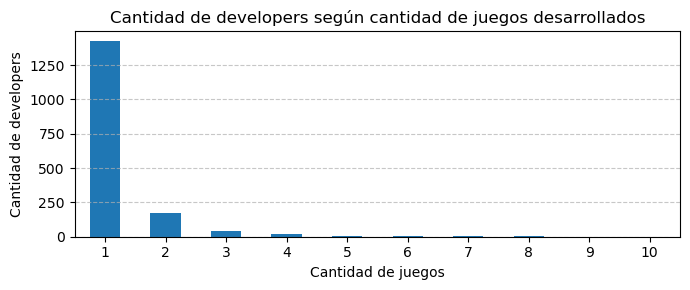

In [292]:
dev_counts = df_features['developer'].value_counts()

# Queremos ver cuántos desarrolladores tienen entre 1 y 10 juegos y cómo es esa distribución
dev_freq_distribution = dev_counts.value_counts().sort_index()
dev_freq_distribution = dev_freq_distribution.loc[1:10]

# Mostrar resultados
for i in range(1, 11):
    cantidad = dev_freq_distribution.get(i, 0)
    print(f"Developers con {i} juego(s): {cantidad}")


dev_freq_distribution = dev_counts.value_counts().sort_index()
dev_freq_distribution = dev_freq_distribution.loc[1:10]

# Creamos gráfico de barras
plt.figure(figsize=(7, 3))
dev_freq_distribution.plot(kind='bar')
plt.title('Cantidad de developers según cantidad de juegos desarrollados')
plt.xlabel('Cantidad de juegos')
plt.ylabel('Cantidad de developers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [293]:
# Reemplazar developers con <=1 juegos por "Other"
dev_counts = df_features['developer'].value_counts()
df_features['developer'] = df_features['developer'].apply(lambda x: x if dev_counts[x] > 1 else 'Other')

# Chequeamos cuántos quedaron
print("Developers luego del agrupamiento:")
print(df_features['developer'].value_counts())

Developers luego del agrupamiento:
developer
Other                    1425
Arc System Works           15
CAPCOM Co., Ltd.           10
Square Enix                 9
Wales Interactive           8
                         ... 
Anatoliy Loginovskikh       2
Vladimir Maslov             2
Voxel Bytes                 2
Travellin Cats              2
Ripknot Systems             2
Name: count, Length: 256, dtype: int64


Como se puede ver, la gran mayoría de los devs tiene dos o menos juegos, decidimos eliminar estos para solamente
quedarnos con los que tienen más de 2 juegos, ya que son los que tienen más probabilidad de ser relevantes evitando el overfitting.

In [294]:
# Lista de developers frecuentes (2 o más juegos)
valid_devs = dev_counts[dev_counts >= 2].index

# Reemplazar los no frecuentes por "Otro" en la misma columna
df_features['developer'] = df_features['developer'].apply(lambda x: x if x in valid_devs else 'Otro')

# Chequear cuántos developers únicos quedan
print(f"Cantidad de developers únicos después del filtrado: {df_features['developer'].nunique()}")

Cantidad de developers únicos después del filtrado: 256


Luego de esta transformación decidimos aplicar target encoding a la variable developer, asignando a cada dev un valor correspondiente al promedio de review_like_rate de los juegos que desarrolló. 

Sin embargo, observamos luego que el 63% de los juegos pasan a tener el mismo valor en la nueva columna developer_encoded (aproximadamente 82.4), debido a que fueron agrupados bajo la categoría Other, que reúne a todos los desarrolladores con baja frecuencia en el dataset.

Esto efecto introduce una pérdida de la capacidad discriminativa del feature, porque muchas entradas comparten el mismo valor. No obstante, decidimos conservarlo porque en los casos restantes el encoding aporta información útil que puede mejorar la predicción del modelo.


In [295]:
# Contar cuántos juegos tienen "Otro" como valor
count_other = (df_features['developer'] == 'Otro').sum()

# Total de juegos
total = len(df_features)

# Porcentaje
percentage_other = 100 * count_other / total

print(f'Juegos con developer="Other": {count_other} de {total} ({percentage_other:.2f}%)')

Juegos con developer="Other": 1425 de 2131 (66.87%)


In [296]:
#Aplicamos el taget encoding
dev_avg_rating = df_features.groupby('developer')['reviews_like_rate'].mean()
df_features['developer'] = df_features['developer'].map(dev_avg_rating)

### User defined tags

Esta columna contiene etiquetas asignadas por los usuarios, separadas por comas. Dado que hay cientos de tags posibles, decidimos contar los 15 más frecuentes y convertirlos en variables binarias. Esto nos permite conservar información relevante sin aumentar demasiado la dimensionalidad.

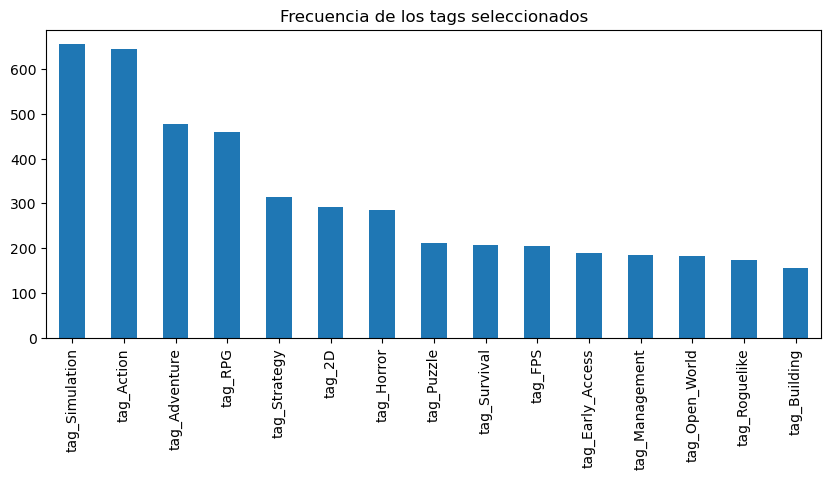

In [297]:
from collections import Counter

# Más comunes
counter = Counter(tag.strip() for tags in df_features["user_defined_tags"] for tag in tags.split(","))
top_tags = [tag for tag, _ in counter.most_common(15)]

# Crear variables binarias 
for tag in top_tags:
    col = f"tag_{tag.replace(' ', '_')}"
    df_features[col] = df_features["user_defined_tags"].str.contains(tag).astype(int)


# Visualización rápida
df_features[[f"tag_{tag.replace(' ', '_')}" for tag in top_tags]].sum().plot.bar(figsize=(10,4), title="Frecuencia de los tags seleccionados")

# Sacamos la columna original de user_defined_tags
df_features = df_features.drop(columns=["user_defined_tags"])

### Supported OS

Esta variable muestra qué sistemas operativos pueden ejecutar el juego en cuestión, los valores posibles son Windows, Linux y Mac, pero dado
que Windows está presente en todos los juegos eliminamos esa variable y binarizamos solamente mac y linux.

In [298]:
df_features['supported_mac'] = df_features['supported_os'].str.contains('mac').astype(int)
df_features['supported_linux'] = df_features['supported_os'].str.contains('linux').astype(int)

# Eliminamos la columna original ya que no aporta más información útil
df_features.drop(columns='supported_os', inplace=True)

### Other features

Esta columna, la útima de las categóricas que nos queda, representa otro conjunto de etiquetas que definen el juego. Entendemos que son etiquetas asignadas por Steam y que tienen que ver con características generales dej juego como Single-Player, Coop, etc.

In [299]:
df_features['other_features'] = df_features['other_features'].fillna('').str.split(',')

# Quitamos espacios y aplanamos la lista
all_features = df_features['other_features'].explode().str.strip()
unique_features = all_features[all_features != ''].unique()

# Cuántas hay y cuáles son
print(f"Cantidad de etiquetas únicas: {len(unique_features)}")
print("Etiquetas únicas:")
print(sorted(unique_features))

Cantidad de etiquetas únicas: 32
Etiquetas únicas:
['Captions available', 'Commentary available', 'Cross-Platform Multiplayer', 'Family Sharing', 'HDR available', 'In-App Purchases', 'Includes Source SDK', 'Includes level editor', 'LAN Co-op', 'LAN PvP', 'MMO', 'Online Co-op', 'Online PvP', 'Remote Play Together', 'Remote Play on Phone', 'Remote Play on TV', 'Remote Play on Tablet', 'Shared/Split Screen Co-op', 'Shared/Split Screen PvP', 'Single-player', 'Stats', 'Steam Achievements', 'Steam Cloud', 'Steam Leaderboards', 'Steam Timeline', 'Steam Trading Cards', 'Steam Turn Notifications', 'Steam Workshop', 'SteamVR Collectibles', 'Tracked Controller Support', 'VR Only', 'VR Supported']


Se puede ver que se trata de 32 etiquetas posibles. Decidimos reducir la dimensionalidad solamente dejando las etiquetas que están presentes en al menos el 5% de los juegos, esto nos deja con 18 etiquetas:

In [300]:
all_features = df_features['other_features'].explode().str.strip()
feature_counts = Counter(all_features[all_features != ''])

# Mostrar ordenado 
feature_freq = pd.Series(feature_counts).sort_values(ascending=False)

min_freq = len(df_features) * 0.05
selected_features = feature_freq[feature_freq >= min_freq].index.tolist()

print(f"\nSeleccionamos {len(selected_features)} etiquetas frecuentes:")
print(selected_features)


Seleccionamos 16 etiquetas frecuentes:
['Single-player', 'Family Sharing', 'Steam Achievements', 'Steam Cloud', 'Steam Trading Cards', 'Online Co-op', 'Online PvP', 'Steam Leaderboards', 'Remote Play on TV', 'Steam Workshop', 'Remote Play Together', 'In-App Purchases', 'Cross-Platform Multiplayer', 'Stats', 'Remote Play on Tablet', 'Includes level editor']


In [301]:
# Binarizamos
df_features['other_features'] = df_features['other_features'].apply(
    lambda lst: [x.strip() for x in lst if x.strip() != '']
)

# Creamos una columna para cada etiqueta frecuente
for feature in selected_features:
    df_features[f'feature_{feature}'] = df_features['other_features'].apply(
        lambda x: int(feature in x)
    )

# Eliminamos la columna original
df_features.drop(columns='other_features', inplace=True)


### Conclusiones sobre las features categóricas

Creamos un gráfico para evaluar la correlación máxima absoluta (Pearson) entre las variables categóricas transformadas (user_defined_tags, supported_os, other_features, developer, release_year, release_month) y reviews_like_rate. Para las variables binarizadas (user_defined_tags, supported_os, other_features), tomamos la correlación absoluta más alta de sus columnas binarias (e.g., tag_Indie, supported_mac) para representar cada variable original. Para developer, release_year y release_month, usamos sus correlaciones absolutas tras codificación. El gráfico de barras ordena estas correlaciones (0.0068 a 0.2778), mostrando que developer y other_features tienen algo de relación con reviews_like_rate, pero todas son débiles a moderadas, sugiriendo que se necesitan modelos no lineales para capturar interacciones más complejas.



C:\Users\joaqu\AppData\Local\Temp\ipykernel_12244\2649188686.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_series.values, y=correlations_series.index, palette='coolwarm')


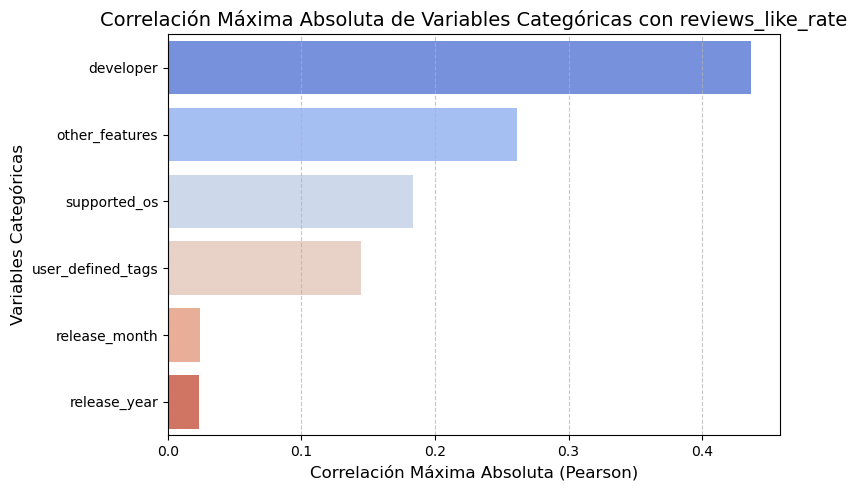


Correlaciones máximas absolutas con reviews_like_rate (ordenadas):
developer            0.4365
other_features       0.2612
supported_os         0.1834
user_defined_tags    0.1443
release_month        0.0240
release_year         0.0230
dtype: float64


In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Identificamos las columnas categóricas
tag_columns = [col for col in df_features.columns if col.startswith('tag_')]
os_columns = [col for col in df_features.columns if col.startswith('supported_')]
feature_columns = [col for col in df_features.columns if col.startswith('feature_')]
other_columns = ['developer', 'release_year', 'release_month']

# Calculamos la correlación absoluta máxima para cada grupo de variables binarizadas
correlations = {}

# Para user_defined_tags
if tag_columns:
    tag_corrs = df_features[tag_columns].corrwith(df_features['reviews_like_rate'])
    correlations['user_defined_tags'] = tag_corrs.abs().max() if not tag_corrs.empty else 0

# Para supported_os
if os_columns:
    os_corrs = df_features[os_columns].corrwith(df_features['reviews_like_rate'])
    correlations['supported_os'] = os_corrs.abs().max() if not os_corrs.empty else 0

# Para other_features
if feature_columns:
    feature_corrs = df_features[feature_columns].corrwith(df_features['reviews_like_rate'])
    correlations['other_features'] = feature_corrs.abs().max() if not feature_corrs.empty else 0

# Para las otras variables categóricas transformadas
for col in other_columns:
    correlations[col] = abs(df_features[col].corr(df_features['reviews_like_rate']))

# Convertimos a una serie y ordenamos
correlations_series = pd.Series(correlations).sort_values(ascending=False)


plt.figure(figsize=(8, 5))
sns.barplot(x=correlations_series.values, y=correlations_series.index, palette='coolwarm')
plt.title('Correlación Máxima Absoluta de Variables Categóricas con reviews_like_rate', fontsize=14)
plt.xlabel('Correlación Máxima Absoluta (Pearson)', fontsize=12)
plt.ylabel('Variables Categóricas', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostramos los valores de correlación
print("\nCorrelaciones máximas absolutas con reviews_like_rate (ordenadas):")
print(correlations_series.round(4))

Las correlaciones máximas absolutas con reviews_like_rate (de 0.0068 a 0.2778) son bajas a moderadas, esto indica asociaciones lineales débiles. developer (0.2778) y other_features (0.2684) muestran cierta relevancia, pero release_month (0.0068) aporta poco. Aunque las correlaciones son limitadas, estas variables pueden contribuir en modelos no lineales al capturar interacciones complejas.

---

## Entrenamiento

### División y escalado de los sets

Optamos por dividir el dataset en un 80% para entrenamiento y 20% para prueba, en línea con lo sugerido en las clases y el enfoque habitual en problemas supervisados con datasets de tamaño moderado como este.

In [303]:
from sklearn.model_selection import train_test_split

# Definimos X e y
X = df_features.drop(columns="reviews_like_rate")
y = df_features["reviews_like_rate"]

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelo de Regresión Lineal

Incluímos ahora un model de Regresión Lineal para tener como baseline para la comparación con los otros modelos.

In [304]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"R2 (Linear Regression): {r2_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")

R2 (Linear Regression): 0.4579
RMSE: 8.1735


El modelo de regresión lineal nos dió un valor de R² = 0.4275, lo que muestra  que es capaz de explicar aproximadamente el 42.75% de la variabilidad de la variable objetivo. Este valor no es muy alto, pero tampoco despreciable, sobre todo si se considera la naturaleza compleja y subjetiva del fenómeno que se está modelando. Además como ya notamos en la selección de features ninguna de las mismas mostró tener una relación linealmente influyente sobre la VO.

### Modelo de Random Forest Regressor

Elegimos también aplicar un modelo de este tipo porque es capaz de capturar relaciones no lineales complejas sin necesidad de una transformación explícita de las variables lo que nos es relevante en este caso considerando que muchas variables categóricas mostraron baja correlación lineal con la variable objetivo.

In [305]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"R2 (Random Forest): {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")

R2 (Random Forest): 0.4036
RMSE: 8.5726


Este valor es inferior al obtenido con regresión lineal, lo que sugiere que no hay una ganancia significativa por capturar relaciones no lineales con las variables utilizadas en el dataset.

El RMSE fue similar al del modelo lineal y sin una mejora en la precisión. Esto refuerza las observaciones realizadas en la etapa de selección de features, donde se mostró que muchas variables no tenían relación fuerte ni lineal ni no lineal con la variable objetivo.

### Modelo de Soporte Vectorial (SVR) + Optuna




In [306]:
import optuna
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

def objective(trial):
    C = trial.suggest_float("C", 0.1, 100.0, log=True)
    epsilon = trial.suggest_float("epsilon", 1, 2, step=0.005)
    #gamma = trial.suggest_categorical("gamma", ["scale", "auto"])
    gamma = trial.suggest_float("gamma", 1e-4, 1.0, log=True)


    svr = SVR(C=C, epsilon=epsilon, gamma=gamma)
    scores = cross_val_score(svr, X_train_scaled, y_train, cv=3, scoring="r2")
    return scores.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=150)

# Entrenar el mejor modelo
best_params = study.best_params
svr_best = SVR(**best_params)
svr_best.fit(X_train_scaled, y_train)
y_pred_svr = svr_best.predict(X_test_scaled)

r2_svr = r2_score(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))

print(f"R2 (SVR Optuna): {r2_svr:.4f}")
print(f"RMSE: {rmse_svr:.4f}")

[I 2025-06-21 16:19:59,544] A new study created in memory with name: no-name-f2377abf-72c9-4d81-a166-b6ae8a789450
[I 2025-06-21 16:19:59,880] Trial 0 finished with value: -0.008241887038863452 and parameters: {'C': 0.18705548557654947, 'epsilon': 1.855, 'gamma': 0.0004005158935745118}. Best is trial 0 with value: -0.008241887038863452.
[I 2025-06-21 16:20:00,217] Trial 1 finished with value: 0.0072637431948318065 and parameters: {'C': 1.2134700967110474, 'epsilon': 1.75, 'gamma': 0.00011411127598665011}. Best is trial 1 with value: 0.0072637431948318065.
[I 2025-06-21 16:20:00,555] Trial 2 finished with value: 0.14217843804634991 and parameters: {'C': 0.25436024055291656, 'epsilon': 1.55, 'gamma': 0.03117389830425406}. Best is trial 2 with value: 0.14217843804634991.
[I 2025-06-21 16:20:00,887] Trial 3 finished with value: 0.13538798449051656 and parameters: {'C': 0.16612716211483683, 'epsilon': 1.8050000000000002, 'gamma': 0.01112878067166854}. Best is trial 2 with value: 0.1421784380

R2 (SVR Optuna): 0.4623
RMSE: 8.1398


Attempt 1


[I 2025-06-21 13:29:23,066] Trial 91 finished with value: 0.4200254494695806 and parameters: {'C': 49.03457043967521, 'epsilon': 1.29, 'gamma': 0.0033503402059963648}. Best is trial 91 with value: 0.4200254494695806.


[I 2025-06-21 13:29:36,939] Trial 113 finished with value: 0.42004159621264964 and parameters: {'C': 74.25831342414793, 'epsilon': 1.2000000000000002, 'gamma': 0.0026756602046047228}. Best is trial 113 with value: 0.42004159621264964.

[I 2025-06-21 13:28:52,856] Trial 42 finished with value: 0.41993382597462725 and parameters: {'C': 59.67700768715875, 'epsilon': 1.1800000000000002, 'gamma': 0.002945603068319705}. Best is trial 42 with value: 0.41993382597462725.



Attempt 2

[I 2025-06-21 13:34:41,755] Trial 100 finished with value: 0.4202453011273071 and parameters: {'C': 67.85386235221125, 'epsilon': 1.455, 'gamma': 0.0027840830830634816}. Best is trial 100 with value: 0.4202453011273071.


[I 2025-06-21 13:34:39,369] Trial 96 finished with value: 0.419946839475607 and parameters: {'C': 69.5428242175481, 'epsilon': 1.6400000000000001, 'gamma': 0.002878823967615369}. Best is trial 96 with value: 0.419946839475607.

[I 2025-06-21 13:34:24,316] Trial 70 finished with value: 0.4198526846619442 and parameters: {'C': 71.04223953957174, 'epsilon': 1.6600000000000001, 'gamma': 0.0027665275612635304}. Best is trial 70 with value: 0.4198526846619442.
